In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
from IPython import display

In [2]:
def gen_1d_regression_data(n=40, xstart=5, xend=10, m=.5, c=2, mu=0, sigma=.4):
    x = np.linspace(xstart, xend, n)
    y = m * x + c + np.random.normal(mu, sigma, n)
    return x, y

def draw_line(n=40, xstart=5, xend=10, m=.5, c=2,):
    x = np.linspace(xstart, xend, n)
    y = m * x + c
    return x, y   

# Generating data for linear regression

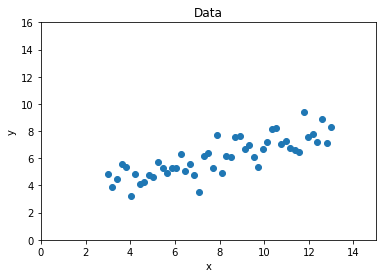

In [3]:
np.random.seed(0)

n = 50
X_data, y_data = gen_1d_regression_data(n=n, sigma=.78, xstart=3, xend=13)

plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,15,0,16])
plt.scatter(X_data, y_data)

# Linear regression using tensorflow

In [4]:
import tensorflow as tf

tf.reset_default_graph()

n_samples = n
batch_size = 10

X_data = np.reshape(X_data, (n_samples, 1)) # n_samples, 1-dimensional features
y_data = np.reshape(y_data, (n_samples, 1)) # n_samples, target values

X = tf.placeholder(tf.float32, shape=(None,1))
y = tf.placeholder(tf.float32, shape=(None,1))

with tf.variable_scope("linear-regression", reuse=False):
    W = tf.get_variable("weights", (1,1), initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(1.0))
    
    y_pred = tf.add(tf.matmul(X, W),b)
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)
    
    opt = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
    
    with tf.Session() as sess:        
        sess.run(tf.global_variables_initializer())
        
        for iter in range(18500):
            indices = np.random.choice(n_samples, batch_size)
            X_batch, y_batch = X_data[indices], y_data[indices]
            _, loss_val = sess.run([opt, loss], feed_dict={X: X_batch, y: y_batch})
            
            total_loss = sess.run([loss], feed_dict={X: X_data, y: y_data})
            
            if iter % 1000 == 0:
                print iter, "total_loss", total_loss, "W", W.eval(), "b", b.eval()
                
            trained_W = W.eval()
            trained_b = b.eval()

0 total_loss [12.946139] W [[ 0.20376544]] b [ 1.01828611]
1000 total_loss [0.86452842] W [[ 0.50424731]] b [ 1.78319025]
2000 total_loss [0.78946239] W [[ 0.50058252]] b [ 2.2377336]
3000 total_loss [0.73020667] W [[ 0.42114219]] b [ 2.50350213]
4000 total_loss [0.67614704] W [[ 0.42351037]] b [ 2.69370556]
5000 total_loss [0.67149431] W [[ 0.4068312]] b [ 2.79636788]
6000 total_loss [0.69646686] W [[ 0.42429942]] b [ 2.85887074]
7000 total_loss [0.66776282] W [[ 0.39323944]] b [ 2.91794038]
8000 total_loss [0.72685766] W [[ 0.42280814]] b [ 2.95496726]
9000 total_loss [0.66652632] W [[ 0.39540151]] b [ 2.97275615]
10000 total_loss [0.67120159] W [[ 0.38079318]] b [ 2.9931941]
11000 total_loss [0.69884109] W [[ 0.36963797]] b [ 2.98015904]
12000 total_loss [0.66620135] W [[ 0.38712913]] b [ 2.98882771]
13000 total_loss [0.66560191] W [[ 0.38957906]] b [ 2.98741603]
14000 total_loss [0.70673174] W [[ 0.36713549]] b [ 2.9810586]
15000 total_loss [0.66816121] W [[ 0.38550892]] b [ 2.9763

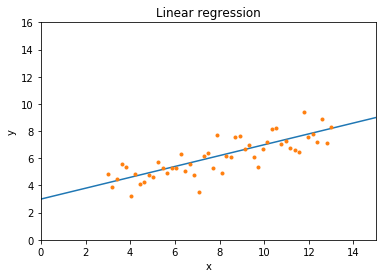

In [5]:
x1,y1 = draw_line(n=40, xstart=0, xend=16, m=trained_W[0][0], c=trained_b[0])

plt.figure()
plt.axis([0,15,0,16])
plt.plot(x1,y1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_data, y_data,'.')
plt.title('Linear regression')